<a href="https://colab.research.google.com/github/nagarajabhishek3/Google-colab-files/blob/main/Volatility_estimator_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf

In [70]:
# Define the ticker symbol for Nifty 50
# ^NSEI is the ticker for Nifty 50 on Yahoo Finance
nifty50_ticker = "^NSEI"

start_date = "2015-01-01"
end_date = "2025-12-31"
# Download daily historical data for Nifty 50

nifty50_data = yf.download(nifty50_ticker, start=start_date, end=end_date)


# Display the first few rows of the downloaded data
print("Nifty 50 Daily Data (first 5 rows):")
print(nifty50_data.head())

# Display the last few rows of the downloaded data
print("\nNifty 50 Daily Data (last 5 rows):")
print(nifty50_data.tail())



/tmp/ipython-input-607351068.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty50_data = yf.download(nifty50_ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Nifty 50 Daily Data (first 5 rows):
Price             Close         High          Low         Open  Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
Date                                                                  
2015-01-02  8395.450195  8410.599609  8288.700195  8288.700195  101900
2015-01-05  8378.400391  8445.599609  8363.900391  8407.950195  118200
2015-01-06  8127.350098  8327.849609  8111.350098  8325.299805  172800
2015-01-07  8102.100098  8151.200195  8065.450195  8118.649902  164100
2015-01-08  8234.599609  8243.500000  8167.299805  8191.399902  143800

Nifty 50 Daily Data (last 5 rows):
Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2025-12-23  26177.150391  26233.550781  26119.050781  26205.199219  216600
2025-12-24  26142.099609  26236.400391  26123.000000  26170.

In [71]:
nifty50_data["log_return"] = np.log(nifty50_data["Close"] / nifty50_data["Close"].shift(1))


In [62]:
nifty50_data.columns = [col[1] for col in nifty50_data.columns]
nifty50_data.index.name = None

In [72]:
nifty50_data = nifty50_data.reset_index()
nifty50_data.columns = ['date', 'close', 'high', 'low', 'open', 'volume', 'log_return']

In [73]:
df = nifty50_data.copy()

In [74]:
df

,date,close,high,low,open,volume,log_return
0,2015-01-02,8395.450195,8410.599609,8288.700195,8288.700195,101900,NaN
1,2015-01-05,8378.400391,8445.599609,8363.900391,8407.950195,118200,-0.002033
2,2015-01-06,8127.350098,8327.849609,8111.350098,8325.299805,172800,-0.030422
3,2015-01-07,8102.100098,8151.200195,8065.450195,8118.649902,164100,-0.003112
4,2015-01-08,8234.599609,8243.500000,8167.299805,8191.399902,143800,0.016221
...,...,...,...,...,...,...,...
2702,2025-12-23,26177.150391,26233.550781,26119.050781,26205.199219,216600,0.000181
2703,2025-12-24,26142.099609,26236.400391,26123.000000,26170.650391,188800,-0.001340
2704,2025-12-26,26042.300781,26144.199219,26008.599609,26121.250000,142200,-0.003825
2705,2025-12-29,25942.099609,26106.800781,25920.300781,26063.349609,234300,-0.003855


In [75]:
daily_vol = df["log_return"].std()
annual_vol = daily_vol * np.sqrt(252)

print(f"Historical Annualized Volatility: {annual_vol:.2%}")


Historical Annualized Volatility: 16.35%


In [76]:
df.head()

,date,close,high,low,open,volume,log_return
0,2015-01-02,8395.450195,8410.599609,8288.700195,8288.700195,101900,NaN
1,2015-01-05,8378.400391,8445.599609,8363.900391,8407.950195,118200,-0.002033
2,2015-01-06,8127.350098,8327.849609,8111.350098,8325.299805,172800,-0.030422
3,2015-01-07,8102.100098,8151.200195,8065.450195,8118.649902,164100,-0.003112
4,2015-01-08,8234.599609,8243.500000,8167.299805,8191.399902,143800,0.016221


In [77]:
windows = [20, 60, 120]

for w in windows:
    df[f"vol_{w}"] = (
        df["log_return"]
        .rolling(w)
        .std()
        * np.sqrt(252)
    )


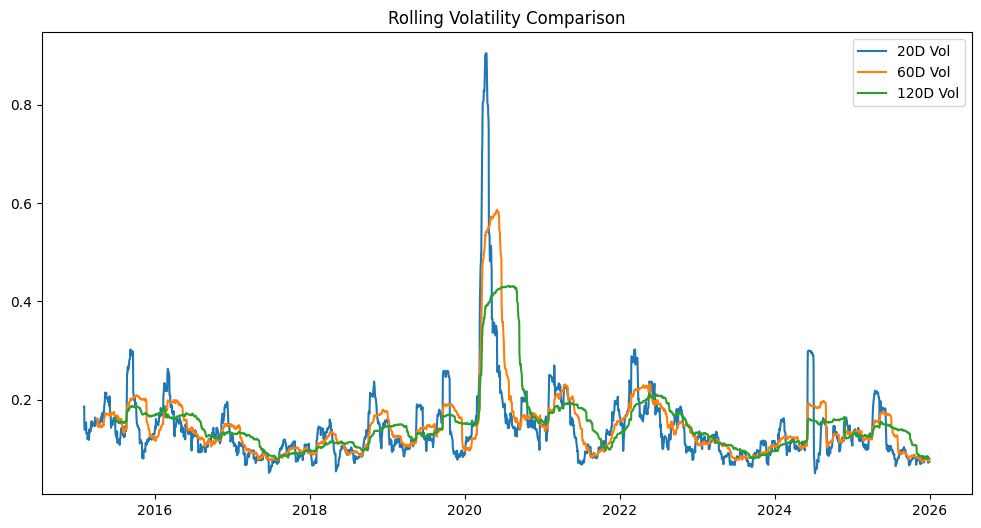

In [79]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["vol_20"], label="20D Vol")
plt.plot(df["date"], df["vol_60"], label="60D Vol")
plt.plot(df["date"], df["vol_120"], label="120D Vol")
plt.legend()
plt.title("Rolling Volatility Comparison")
plt.show()


In [84]:
df = df.dropna(subset=["log_return"]).reset_index(drop=True)

In [85]:
lambda_ = 0.94

df["ewma_var"] = 0.0
df.loc[0, "ewma_var"] = df.loc[0, "log_return"]**2

for i in range(1, len(df)):
    df.loc[i, "ewma_var"] = (
        lambda_ * df.loc[i-1, "ewma_var"]
        + (1 - lambda_) * df.loc[i, "log_return"]**2
    )

df["ewma_vol"] = np.sqrt(df["ewma_var"]) * np.sqrt(252)


In [86]:
df.head()

,date,close,high,low,open,volume,log_return,vol_20,vol_60,vol_120,ewma_var,ewma_vol
0,2015-01-05,8378.400391,8445.599609,8363.900391,8407.950195,118200,-0.002033,NaN,NaN,NaN,0.000004,0.032271
1,2015-01-06,8127.350098,8327.849609,8111.350098,8325.299805,172800,-0.030422,NaN,NaN,NaN,0.000059,0.122362
2,2015-01-07,8102.100098,8151.200195,8065.450195,8118.649902,164100,-0.003112,NaN,NaN,NaN,0.000056,0.119250
3,2015-01-08,8234.599609,8243.500000,8167.299805,8191.399902,143800,0.016221,NaN,NaN,NaN,0.000069,0.131704
4,2015-01-09,8284.500000,8303.299805,8190.799805,8285.450195,148000,0.006042,NaN,NaN,NaN,0.000067,0.129835


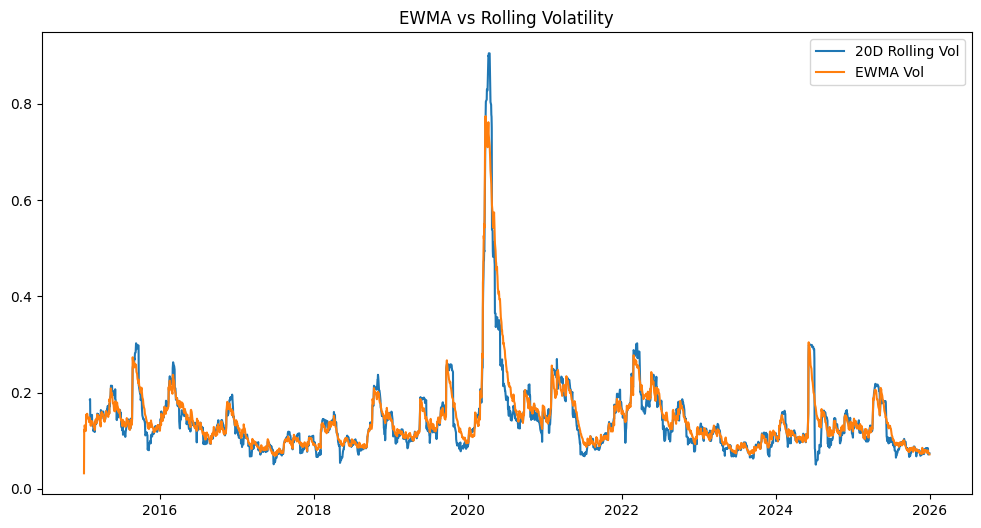

In [87]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["vol_20"], label="20D Rolling Vol")
plt.plot(df["date"], df["ewma_vol"], label="EWMA Vol")
plt.legend()
plt.title("EWMA vs Rolling Volatility")
plt.show()


In [92]:
from scipy.stats import norm

z_95 = norm.ppf(0.05)

df["VaR_20"] = z_95 * df["vol_20"] / np.sqrt(252)
df["VaR_EWMA"] = z_95 * df["ewma_vol"] / np.sqrt(252)

df["VaR_20_breach"] = df["log_return"] < df["VaR_20"]
df["VaR_EWMA_breach"] = df["log_return"] < df["VaR_EWMA"]

print("20D VaR breach rate:", df["VaR_20_breach"].mean())
print("EWMA VaR breach rate:", df["VaR_EWMA_breach"].mean())

20D VaR breach rate: 0.056910569105691054
EWMA VaR breach rate: 0.04767184035476718


In [93]:
df["cum_return"] = np.exp(df["log_return"].cumsum())
df["running_max"] = df["cum_return"].cummax()
df["drawdown"] = df["cum_return"] / df["running_max"] - 1
max_dd = df["drawdown"].min()
print(f"Maximum Drawdown: {max_dd:.2%}")


Maximum Drawdown: -38.44%


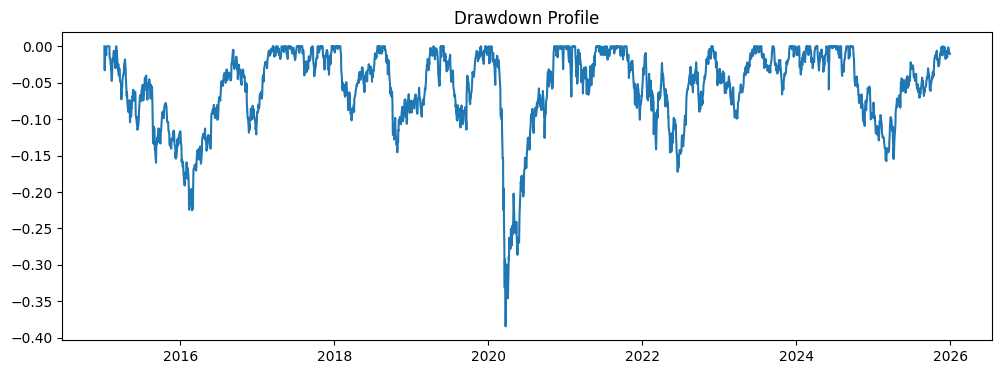

In [95]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["drawdown"])
plt.title("Drawdown Profile")
plt.show()


In [96]:
df["high_vol"] = df["ewma_vol"] > df["ewma_vol"].rolling(252).median()

avg_dd_high_vol = df[df["high_vol"]]["drawdown"].mean()
avg_dd_low_vol = df[~df["high_vol"]]["drawdown"].mean()

print("Avg Drawdown (High Vol Regime):", avg_dd_high_vol)
print("Avg Drawdown (Low Vol Regime):", avg_dd_low_vol)


Avg Drawdown (High Vol Regime): -0.07446166123488386
Avg Drawdown (Low Vol Regime): -0.04128451612019445


Abstract

This study examines volatility not as a static parameter, but as a time-varying risk state that directly influences downstream risk measures and capital outcomes. Using daily index data, we compare traditional historical volatility with rolling-window estimators and an EWMA (Exponentially Weighted Moving Average) framework. We extend the analysis by translating volatility into Value at Risk (VaR) and drawdowns, highlighting how different volatility models behave across market regimes and stress periods.

1. Motivation

Volatility is central to risk management, pricing, and portfolio construction. Despite this, it is often treated as a single long-term estimate, ignoring its well-documented clustering and regime-dependent behavior. This research aims to demonstrate why static volatility is insufficient and how faster-reacting models materially improve risk awareness, especially during periods of market stress.

2. Data and Methodology
Data

Daily closing prices of a broad equity index

Sample period spans multiple market regimes, including calm and high-stress environments

Returns constructed using log returns to preserve time additivity

Volatility Estimators

Historical Volatility: Full-sample standard deviation (baseline)

Rolling Volatility: 20, 60, and 120-day rolling windows

EWMA Volatility: RiskMetrics-style model with λ = 0.94

Risk Extensions

1-day 95% Value at Risk (VaR) derived from rolling and EWMA volatility

Drawdowns computed from cumulative returns to capture realized capital loss

3. Empirical Results
Volatility Dynamics

Historical volatility provides a single average risk estimate and fails to reflect regime changes. Rolling volatility captures time variation but reacts with a lag that increases with window length. Short windows respond faster but are noisy; longer windows are smoother but slow to adjust.

EWMA volatility reacts immediately to large shocks and remains elevated after stress events, reflecting volatility clustering. This behavior makes EWMA more suitable for real-time risk monitoring.

VaR Performance

VaR estimates are highly sensitive to the underlying volatility model. Rolling-volatility-based VaR tends to underestimate risk immediately following market shocks, leading to clustered violations. EWMA-based VaR adapts more quickly, producing more stable exception rates during volatile regimes.

Drawdowns and Risk Regimes

High-volatility regimes coincide with deeper and more persistent drawdowns, while low-volatility regimes exhibit shallow and quickly recovering losses. This confirms that volatility spikes are not merely statistical artifacts but directly translate into capital damage.

4. Key Insights

Volatility is state-dependent, not constant

Faster volatility estimators improve downstream risk measures

VaR is only as reliable as the volatility model beneath it

Drawdowns provide the ultimate validation of any risk metric

Core takeaway:
Volatility measures uncertainty, but drawdowns measure survival.

5. Limitations and Extensions

This analysis assumes conditional normality of returns and uses daily data, which may understate intraday risk and tail dependence. Future extensions could include Expected Shortfall, regime-switching volatility models, event-driven volatility analysis, and portfolio-level correlation effects.

6. Conclusion

Treating volatility as a dynamic risk state significantly improves risk estimation and capital awareness. Models like EWMA that respond rapidly to market shocks provide more realistic inputs for VaR and better align with observed drawdowns during stress. Ignoring volatility dynamics leads to systematic underestimation of risk precisely when accurate risk measurement is most critical.

One-line summary

Dynamic volatility modeling materially improves risk measurement and better explains capital drawdowns during market stress compared to static or slow-moving volatility estimates.